Original repository : https://github.com/jonathanventura/urban-tree-detection.git </br>
Data  : https://github.com/jonathanventura/urban-tree-detection-data/ </br>
Modified : https://github.com/Jooyoung01/urban-tree-detection.git</br>


---


Citation : J. Ventura, C. Pawlak, M. Honsberger, C. Gonsalves, J. Rice, N.L.R. Love, S. Han, V. Nguyen, K. Sugano, J. Doremus, G.A. Fricker, J. Yost, and M. Ritter. "[Individual Tree Detection in Large-Scale Urban Environments using High-Resolution Multispectral Imagery.](https://doi.org/10.48550/arXiv.2208.10607)" arXiv:2208.10606 [cs], Oct. 2022.

First of all, to set the runtime type to GPU, check the top menu bar in Colab.
1. Select "Runtime"
2. Choose "Change runtime type"
3. Pick the GPU option
4. Click the "Save" button to save the settings.

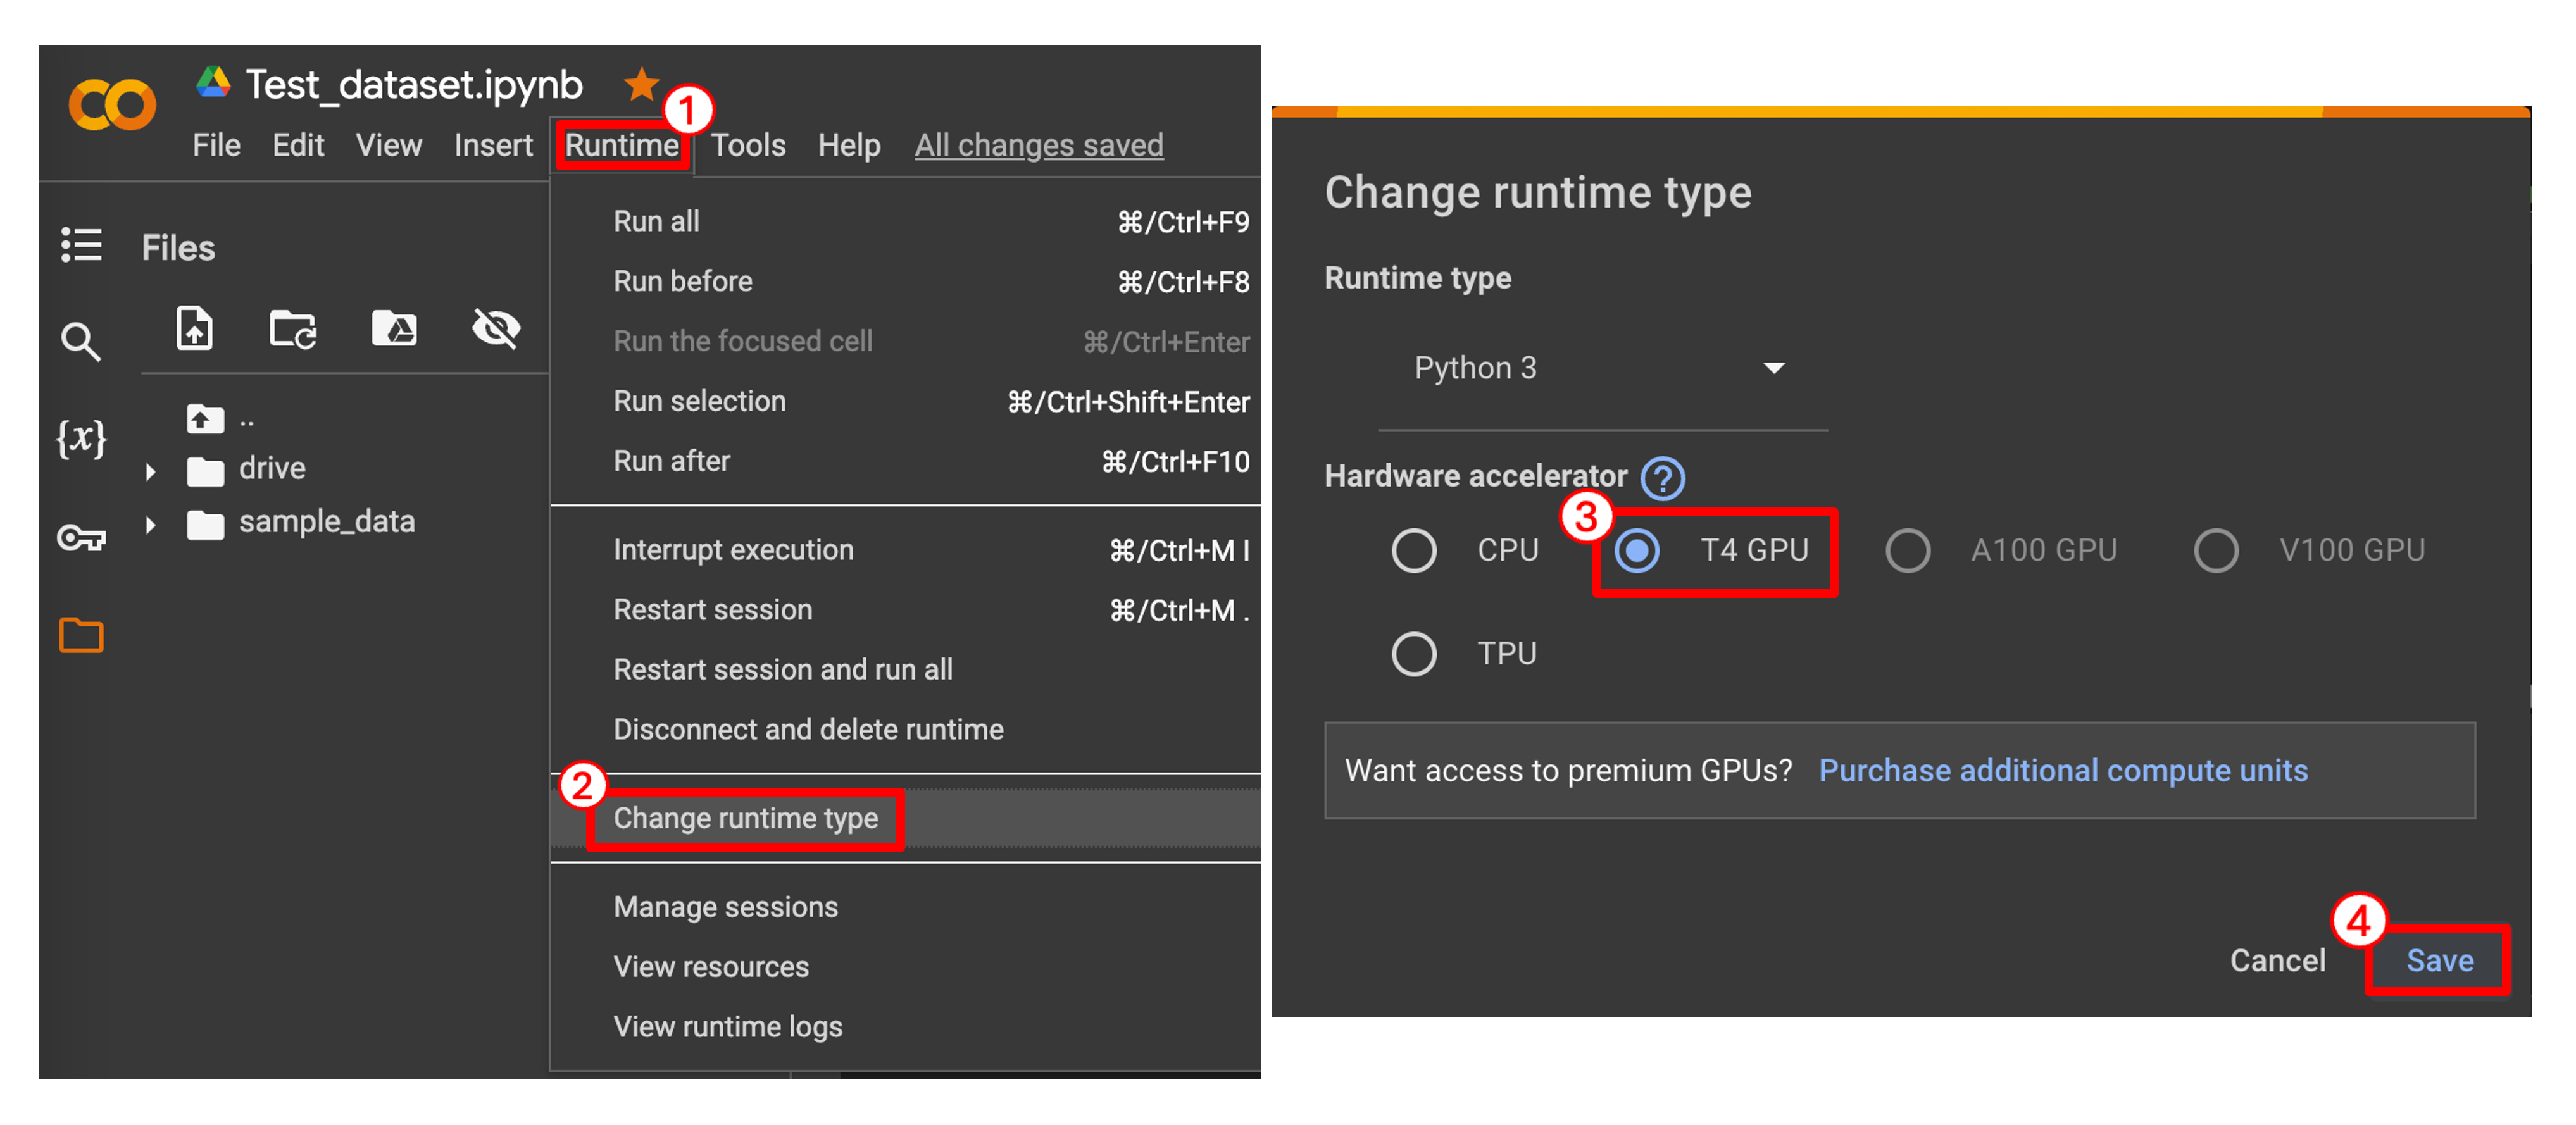

# Urban-tree-detection Colab version Tutorial

To connect to Google Drive with Colab, you may need your Google account permissions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Ready for the tree Dataset

In [ ]:
%mkdir -p /content/drive/MyDrive/ProjectCenter/TreeProject
%cd /content/drive/MyDrive/ProjectCenter/TreeProject

In [ ]:
!git clone https://github.com/Jooyoung01/urban-tree-detection.git

Cloning into 'urban-tree-detection'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 154 (delta 84), reused 98 (delta 38), pack-reused 0
Receiving objects: 100% (154/154), 2.00 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
!git clone https://github.com/jonathanventura/urban-tree-detection-data/

Cloning into 'urban-tree-detection-data'...
remote: Enumerating objects: 5113, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5113 (delta 0), reused 0 (delta 0), pack-reused 5110
Receiving objects: 100% (5113/5113), 360.74 MiB | 17.48 MiB/s, done.
Resolving deltas: 100% (1897/1897), done.
Updating files: 100% (4945/4945), done.


In [ ]:
%cd /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection-data/images
%ls

/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection-data/images
bishop_2020_0.tif      claremont_2020_29.tif     palm_springs_2016_29.tif  riverside_2018_4.tif
bishop_2020_1.tif      claremont_2020_2.tif      palm_springs_2016_2.tif   riverside_2018_50.tif
bishop_2020_2.tif      claremont_2020_30.tif     palm_springs_2016_30.tif  riverside_2018_51.tif
bishop_2020_3.tif      claremont_2020_31.tif     palm_springs_2016_31.tif  riverside_2018_52.tif
bishop_2020_4.tif      claremont_2020_32.tif     palm_springs_2016_32.tif  riverside_2018_53.tif
bishop_2020_5.tif      claremont_2020_33.tif     palm_springs_2016_33.tif  riverside_2018_54.tif
bishop_2020_6.tif      claremont_2020_34.tif     palm_springs_2016_34.tif  riverside_2018_55.tif
bishop_2020_7.tif      claremont_2020_35.tif     palm_springs_2016_35.tif  riverside_2018_56.tif
bishop_2020_8.tif      claremont_2020_36.tif     palm_springs_2016_36.tif  riverside_2018_57.tif
bishop_2020_9.tif      claremont_2020_37.tif  

In [ ]:
%cd /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection
%ls

/content/drive/MyDrive/ProjectCenter/TreeProject1/urban-tree-detection
environment.yml  LICENSE  models/  README.md  scripts/  testdata/  utils/


In [ ]:
!python -m scripts.prepare -h

usage: prepare.py [-h] [--train TRAIN] [--val VAL] [--test TEST] [--augment] [--sigma SIGMA]
                  [--bands BANDS]
                  dataset output

positional arguments:
  dataset        path to dataset
  output         output path for .h5 file

options:
  -h, --help     show this help message and exit
  --train TRAIN
  --val VAL
  --test TEST
  --augment
  --sigma SIGMA  Gaussian kernel size in pixels
  --bands BANDS  description of bands in input raster (RGB or RGBN)


parser. add
_argument ('dataset',help='path to dataset')
</br>
parser.add _argument ('output',help='output path for -h5 file')
</br>
parser. add
_argument ('--train',default='train.txt')
</br>
parser.add_argument ('--val' ,default='val.txt')
</br>
parser-add _argument ('--test' ,default='test.txt')
</br>
parser.add_argument ('--augment' ,action='store_true')
</br>
parser.add_argument('--sigma',type=float,default=3,help='Gaussian kernel size in pixels')
</br>
parser.add_argument('--bands' ,default='RGBN',help='description of bands in input raster (RGB or RGBI)


## Get Dataset

In [ ]:
%cd /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection

/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection


In [ ]:
# python3 -m scripts.prepare <path to dataset> <path to hdf5 file> --bands RGBN

#### Get .h5 file for train and test

In [ ]:
!python -m scripts.prepare ../urban-tree-detection-data ./dataset.h5

  0% 0/383 [00:00<?, ?it/s]/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/scripts/prepare.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
100% 383/383 [00:04<00:00, 78.27it/s]
100% 43/43 [00:00<00:00, 70.04it/s]
100% 48/48 [00:00<00:00, 70.83it/s]


##### Get .h5 file information

In [ ]:
%cd /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection
%ls

/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection
dataset.h5  environment.yml  LICENSE  models/  README.md  scripts/  utils/


In [ ]:
%ls -l /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/dataset.h5

-rw------- 1 root root 621293952 Feb 14 02:01 /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/dataset.h5


In [ ]:
!stat -c "%s" /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/dataset.h5 | awk '{printf "%.2f MB\n", $1/1024/1024}'

592.51 MB


In [ ]:
import h5py
# Open the HDF5 file
file_path = 'dataset.h5'
hdf5_file = h5py.File(file_path, 'r')

# Get the names of groups
group_names = list(hdf5_file.keys())
print("Group names:")
for name in group_names:
    print(name)

# Get the names of datasets within each group
print("\nDatasets within each group:")
for group_name in group_names:
    datasets = list(hdf5_file[group_name].keys())
    print(f"Group: {group_name}")
    for dataset_name in datasets:
        print(f"  - {dataset_name}")

# Close the HDF5 file
hdf5_file.close()

Group names:
test
train
val

Datasets within each group:
Group: test
  - attention
  - confidence
  - gt
  - images
  - names
Group: train
  - attention
  - confidence
  - gt
  - images
  - names
Group: val
  - attention
  - confidence
  - gt
  - images
  - names


## Pre-trained weights
[Pre-trained weights](https://cpslo-my.sharepoint.com/:u:/g/personal/jventu09_calpoly_edu/EUMJLY3xLt1KnJA-gu6T1boBdWzzPHzJSKoUxRNKyiZDrg?e=vGfvFn) for a model trained on 60cm NAIP 2020 imagery from Southern California are available. The pretrained directory should be used as the log directory for the inference script.

We also provide an [example NAIP 2020 tile from Los Angeles](https://cpslo-my.sharepoint.com/:i:/g/personal/jventu09_calpoly_edu/EU1xfporUiBDvT2ZOpW0raEBOqJcJQpqcOv1lKNMCgbCdQ?e=zsgxXs) and an [example GeoJSON predictions](https://cpslo-my.sharepoint.com/:u:/g/personal/jventu09_calpoly_edu/EaoRmlVJ4hRKhf2-LLeg-r4BwDM4bSUz5NI3P3ydIWs7kA?e=ZvbPFT) file.

You can explore a [map of predictions for the entire urban reserve of California](https://jventu09.users.earthengine.app/view/urban-tree-detector)(based on NAIP 2020 imagery) created using this pre-trained model.

## Evaluation on test dataset
Once hyperparameter tuning finishes, use the test.py script to compute evaluation metrics on the test set.



#### Download Pre-trained weights for **test** and **inference**.</br> You can also download it from [here](https://cpslo-my.sharepoint.com/:u:/g/personal/jventu09_calpoly_edu/EUMJLY3xLt1KnJA-gu6T1boBdWzzPHzJSKoUxRNKyiZDrg?e=vGfvFn), and put them under the "urban-tree-detection" folder.

In [ ]:
%cd /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection
!gdown 1Xm2GbR7Rcx4nyMg9pjKg5eecX8_XbNfR

Downloading...
From (original): https://drive.google.com/uc?id=1Xm2GbR7Rcx4nyMg9pjKg5eecX8_XbNfR
From (redirected): https://drive.google.com/uc?id=1Xm2GbR7Rcx4nyMg9pjKg5eecX8_XbNfR&confirm=t&uuid=6fbd7560-8769-46d4-acf5-e7ca74d9c633
To: /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/pretrained.tgz
100% 127M/127M [00:02<00:00, 48.6MB/s]


In [ ]:
!tar -xvzf pretrained.tgz
%ls pretrained

pretrained/
pretrained/weights.best.h5
pretrained/weights.latest.h5
pretrained/params.yaml
pretrained/tensorboard/
pretrained/tensorboard/validation/
pretrained/tensorboard/validation/events.out.tfevents.1657795881.elcapitan.csc.calpoly.edu.61997.10101.v2
pretrained/tensorboard/train/
pretrained/tensorboard/train/plugins/
pretrained/tensorboard/train/plugins/profile/
pretrained/tensorboard/train/plugins/profile/2022_07_14_03_50_31/
pretrained/tensorboard/train/plugins/profile/2022_07_14_03_50_31/elcapitan.csc.calpoly.edu.memory_profile.json.gz
pretrained/tensorboard/train/plugins/profile/2022_07_14_03_50_31/elcapitan.csc.calpoly.edu.kernel_stats.pb
pretrained/tensorboard/train/plugins/profile/2022_07_14_03_50_31/elcapitan.csc.calpoly.edu.xplane.pb
pretrained/tensorboard/train/plugins/profile/2022_07_14_03_50_31/elcapitan.csc.calpoly.edu.overview_page.pb
pretrained/tensorboard/train/plugins/profile/2022_07_14_03_50_31/elcapitan.csc.calpoly.edu.trace.json.gz
pretrained/tensorboard/train/

#### Get Test results:

precision:  0.7362307980517048 </br>
recall:  0.7332089552238806 </br>
fscore:  0.7347167694896242 </br>
rmse [px]:  3.595091366549985

In [ ]:
# python3 -m scripts.test <path to hdf5 file> <path to log directory>

In [ ]:
log_folder = f"/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/pretrained"
!python -m scripts.test ./dataset.h5 {log_folder}

2024-02-14 02:48:23.648692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 02:48:23.648744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 02:48:23.650069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 02:48:23.657166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 02:48:24.713653: W tensorflow/comp

## Inference on a large raster
To detect trees in rasters and produce GeoJSONs containing the geo-referenced trees, use the inference.py script. The script can process a single raster or a directory of rasters.

In [ ]:
# python3 -m scripts.inference <input tiff or directory> \
#                              <output json or directory> \
#                              <path to log directory>

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.7 MB/s eta 0:00:00


In [ ]:
%mkdir /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/output_json
log_folder = f"/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/pretrained"
json_folder = f"/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/output_json"
test_folder = f"/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata"

In [ ]:
# It takes around 24:00 mins
!python -m scripts.inference {test_folder} \
                             {json_folder} \
                             {log_folder}

2024-02-14 09:10:00.561258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 09:10:00.561339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 09:10:00.563346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 09:10:00.573194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 09:10:02.059606: W tensorflow/compiler/tf2

### Let's check the TEST results

In [ ]:
output_folder = f"/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output"
%mkdir {output_folder}

In [ ]:
from osgeo import gdal, osr
import json
import os
import glob
## Function to convert geographic coordinates to pixel coordinates
def geo_to_pixel(x_geo, y_geo, geo_transform):
    x_pixel = int((x_geo - geo_transform[0]) / geo_transform[1])
    y_pixel = int((y_geo - geo_transform[3]) / geo_transform[5])
    return (x_pixel, y_pixel)
## Get the test dataset path
test_folder_path = '/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata'
test_file_names = []
output_paths = []

for tif_file in glob.glob(os.path.join(test_folder_path, '*.tif')):
    base_name_with_extension = os.path.basename(tif_file)
    file_name, _ = os.path.splitext(base_name_with_extension)
    test_file_names.append(file_name)

for test_file_name in test_file_names:
    image_path = f'/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata/{test_file_name}.tif'
    json_path = f'/content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/output_json/{test_file_name}.json'
    with open(json_path, 'r') as file:
        data = json.load(file)
    ## Load the image using GDAL(for .tif)
    dataset = gdal.Open(image_path)
    geo_transform = dataset.GetGeoTransform()
    projection = dataset.GetProjection()

    ## Setup coordinate transformation
    source_projection = osr.SpatialReference()
    source_projection.ImportFromEPSG(26911)  # EPSG code for UTM zone 11N
    target_projection = osr.SpatialReference()
    target_projection.ImportFromWkt(projection)
    transform = osr.CoordinateTransformation(source_projection, target_projection)

    ## Open the image for editing
    from PIL import Image, ImageDraw
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    for feature in data['features']:
        x_geo, y_geo = feature['geometry']['coordinates']
        ## Transform coordinates
        x_geo_transformed, y_geo_transformed, _ = transform.TransformPoint(x_geo, y_geo)
        ## Convert transformed geographic coordinates to pixel coordinates
        x_pixel, y_pixel = geo_to_pixel(x_geo_transformed, y_geo_transformed, geo_transform)
        ## Draw a point on the image
        point_radius = 3  # Size of the point
        draw.ellipse((x_pixel - point_radius, y_pixel - point_radius, x_pixel + point_radius, y_pixel + point_radius), fill='green')
    output_file_path = f'{output_folder}/overlayed_{test_file_name}.tif'
    output_paths.append(output_file_path)
    image.save(output_file_path)
    print(f"Overlay image saved to {output_file_path}")


Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/overlayed_claremont_2020_33.tif
Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/overlayed_long_beach_2020_53.tif
Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/overlayed_claremont_2020_35.tif
Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/overlayed_long_beach_2020_50.tif
Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/overlayed_riverside_2020_36.tif
Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/overlayed_riverside_2020_33.tif
Overlay image saved to /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/testdata_infer_output/o

##### Get grid outputs

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

## Ensure we have exactly 10 paths for grid output :)
assert len(output_paths) == 10, "The number of output paths must be exactly 10."
## Set up the figure and axes for a 5x2 grid of images
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iterating
for idx, file_path in enumerate(output_paths):
    with rasterio.open(file_path) as src:
        # band1 = src.read(1)
        ## Read the three bands (assuming RGB order)
        r = src.read(1)
        g = src.read(2)
        b = src.read(3)
        rgb = np.dstack((r, g, b))
    ax = axes[idx]
    ax.imshow(rgb)
    # plt.imshow(band1, cmap='gray')  # 'gray' for grayscale images
    # plt.colorbar()  # add a color bar to interpret values
    output_file_name = os.path.basename(file_path)
    ax.set_title(f'{output_file_name}', fontsize=10)
    ax.axis('off')  # Turn off axis numbers and ticks
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

#### Get individual outputs


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

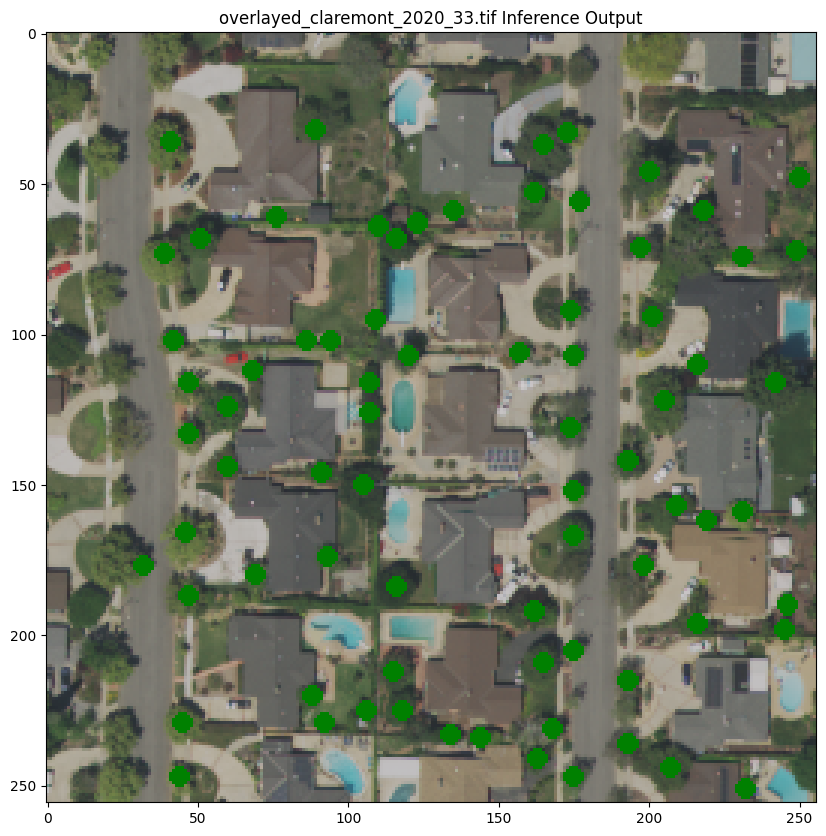

In [ ]:
## Please change output_index value
output_index = 0
output_file_name = os.path.basename(output_paths[output_index])
with rasterio.open(output_paths[output_index]) as src:
    # band1 = src.read(1)
    ## Read the three bands (assuming RGB order)
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)
    ## Stack bands for RGB display
    rgb = np.dstack((r, g, b))
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
# plt.imshow(band1, cmap='gray')  # 'gray' for grayscale images
# plt.colorbar()  # add a color bar to interpret values
plt.title(f'{output_file_name} Inference Output')
plt.show()

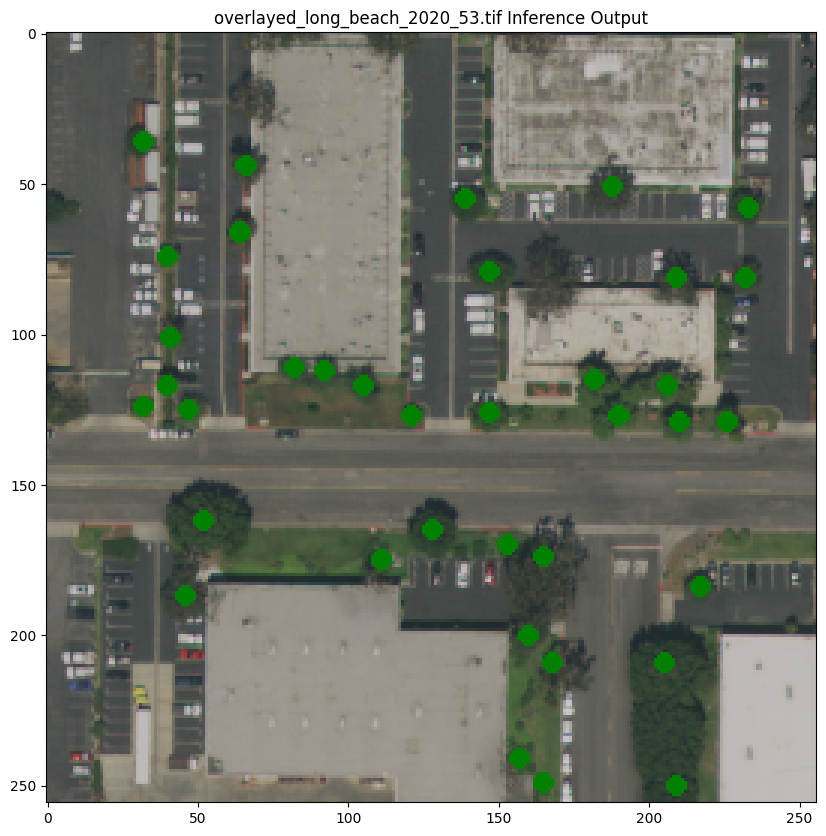

In [ ]:
## Please change output_index value
output_index = 1
output_file_name = os.path.basename(output_paths[output_index])
with rasterio.open(output_paths[output_index]) as src:
    # band1 = src.read(1)
    ## Read the three bands (assuming RGB order)
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)
    ## Stack bands for RGB display
    rgb = np.dstack((r, g, b))
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
# plt.imshow(band1, cmap='gray')  # 'gray' for grayscale images
# plt.colorbar()  # add a color bar to interpret values
plt.title(f'{output_file_name} Inference Output')
plt.show()

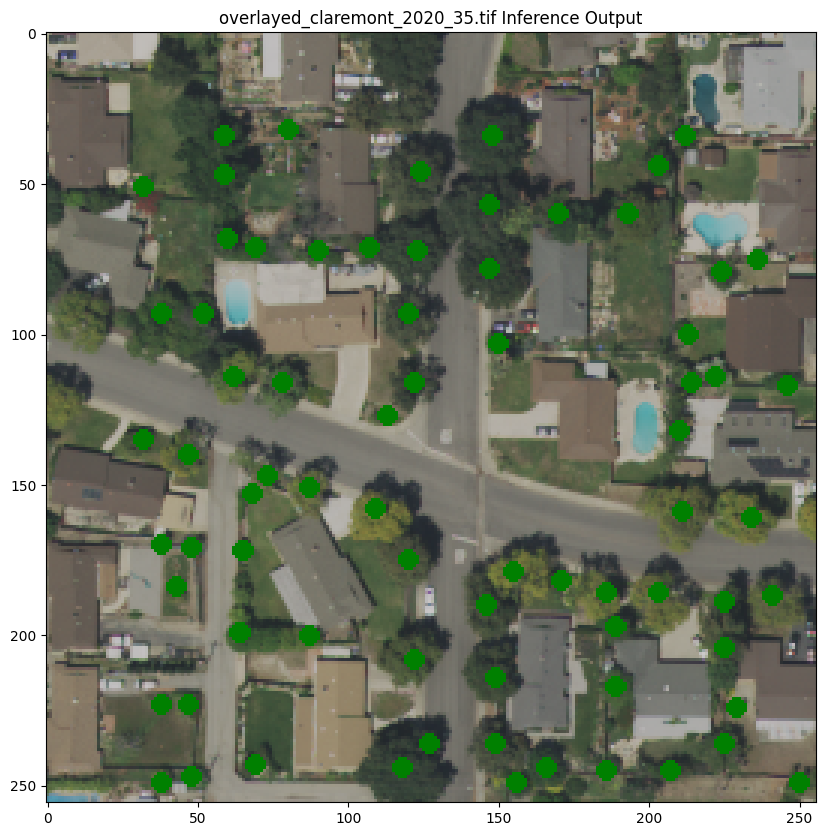

In [ ]:
## Please change output_index value
output_index = 2
output_file_name = os.path.basename(output_paths[output_index])
with rasterio.open(output_paths[output_index]) as src:
    # band1 = src.read(1)
    ## Read the three bands (assuming RGB order)
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)
    ## Stack bands for RGB display
    rgb = np.dstack((r, g, b))
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
# plt.imshow(band1, cmap='gray')  # 'gray' for grayscale images
# plt.colorbar()  # add a color bar to interpret values
plt.title(f'{output_file_name} Inference Output')
plt.show()

## Training

In [ ]:
# python3 -m scripts.train <path to hdf5 file> <path to log directory>

In [ ]:
!python -m scripts.train /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/dataset.h5 /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/pretrained

## Hyperparameter tuning
The model outputs a confidence map, and we use local peak finding to isolate individual trees. We use the Optuna package to determine the optimal parameters of the peaking finding algorithm. We search for the best of hyperparameters to maximize F-score on the validation set.



In [ ]:
# python3 -m scripts.tune <path to hdf5 file> <path to log directory>

In [ ]:
!python -m scripts.tune /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/dataset.h5 /content/drive/MyDrive/ProjectCenter/TreeProject/urban-tree-detection/pretrained